# Ejercicios 2

## Parte 3

_Nota:_ Todas las funciones siguientes suponen mismo tamaño de bin y de caja para DD, RR y DR.

### 3. Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de

#### a) Peebles - Hauser

El estimador de Peebles-Hauser es

$$
\frac{n_R(n_R - 1)DD}{n_D(n_d - 1)RR} - 1
$$

donde las $n$ son el número de puntos de la distibución aleatoria y la de datos, respectivamente, y $DD$ y $RR$ son los histogramas de las distribuciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros # Funciones creadas en las partes 1 y 2 de este ejercicio

In [18]:
def peebles_hauser(DD, nD, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR, histo_RR = distros.save_hist(x_RR, y_RR, box_size, bin_size)
    RR = histo_RR[0]
    bins_RR = histo_RR[1]
    bins_RR = bins_RR[:-1]
    plt.hist(dist_RR, bins = bins_RR, alpha = 0.5);
    
    return nR * (nR - 1.0) * DD / (nD * (nD - 1.0) * RR) - 1.0

Malla cuadriculada.

In [3]:
box_size = 500
net_size = 10.0
bin_size = 20.0

In [4]:
x_malla, y_malla = distros.unif_cuad_dist(box_size, net_size)
dist_malla, hist_malla = distros.save_hist(x_malla, y_malla, box_size, bin_size)
frec_malla = hist_malla[0]
bins_malla = hist_malla[1]
bins_malla = bins_malla[:-1]

Text(0.5,1,'Histograma de distancias de la malla')

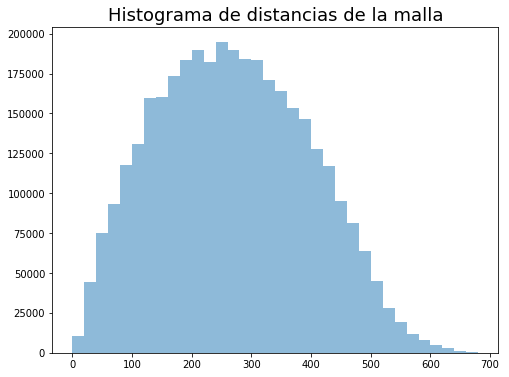

In [5]:
plt.figure(figsize = (8, 6))
plt.hist(dist_malla, bins = bins_malla, alpha = 0.5);
plt.title('Histograma de distancias de la malla', fontsize = 18)

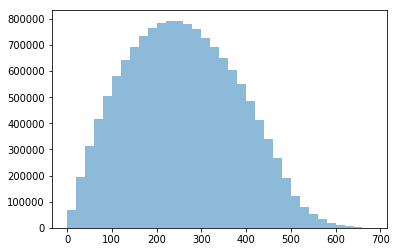

In [19]:
n_malla = len(x_malla)
f_corr = peebles_hauser(frec_malla, n_malla, 2 * n_malla, box_size, bin_size)

(-0.5, 0.5)

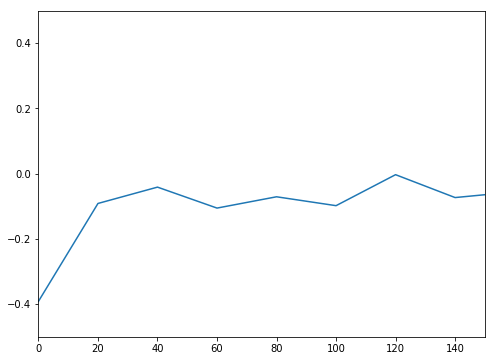

In [25]:
plt.figure(figsize = (8,6))
plt.plot(bins_malla, f_corr)
plt.xlim([0.0, 150.0])
plt.ylim([-0.5, 0.5])

Disco.

In [3]:
n_points = 1000
radius = 300.0
box_size = 1000
bin_size = 50.0

In [5]:
x_disco, y_disco = distros.unif_disc_dist(n_points, radius, box_size / 2.0, box_size / 2.0)
dist_disco, hist_disco = distros.save_hist(x_disco, y_disco, box_size, bin_size)
frec_disco = hist_disco[0]
bins_disco = hist_disco[1]
bins_disco = bins_disco[:-1]
n_disco = len(x_disco)
f_corr = peebles_hauser(frec_disco, n_disco, 10 * n_disco, box_size, bin_size)

Misma historia. $10^8$ distancias. Creo que voy a tener que paralelizar o buscar una forma de optimizar el cálculo de las distancias...

#### b) Davis-Peebles

El estimados de Davis-Peebles es

$$
\frac{1}{n_{est}}\frac{DD}{DR} - 1
$$

donde $n_{est} = \frac{<D>}{<R>}$ es la razón entre los promedios de las distancias entre los puntos de ambas distribuciones y DR es el histograma de las distancias entre los puntos de los datos y del random.

In [ ]:
def davis_peebles(x_data, y_data, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR, histo_RR = distros.save_hist(x_RR, y_RR, box_size, bin_size)
    dist_DD, histo_DD = distros.save_hist(x_data, y_data, box_size, bin_size)
    dist_DR, histo_DR = distros.save_hist_DR(x_data, y_data, box_size, x_RR, y_RR, box_size, bin_size)
    inv_nest = np.average(dist_RR) / np.average(dist_DD)
    DD = histo_DD[0]
    DR = histo_DR[0]
    
    return inv_nest * DD / DR - 1.0

#### c) Hamilton

El estimador de Hamilton es

$$
\frac{DDRR}{DR}
$$

In [ ]:
def hamilton(x_data, y_data, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR, histo_RR = distros.save_hist(x_RR, y_RR, box_size, bin_size)
    dist_DD, histo_DD = distros.save_hist(x_data, y_data, box_size, bin_size)
    dist_DR, histo_DR = distros.save_hist_DR(x_data, y_data, box_size, x_RR, y_RR, box_size, bin_size)
    RR = histo_RR[0]
    DD = histo_DD[0]
    DR = histo_DR[0]
    
    return RR * DD / DR

#### d) Landy-Szalay

El estimador de Landy-Szalay es

$$
\frac{1}{n_{est}^2}\frac{DD}{RR} + 1
$$

In [1]:
def landy_szalay(x_data, y_data, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR, histo_RR = distros.save_hist(x_RR, y_RR, box_size, bin_size)
    dist_DD, histo_DD = distros.save_hist(x_data, y_data, box_size, bin_size)
    inv_nest = np.average(dist_RR) / np.average(dist_DD)
    DD = histo_DD[0]
    RR = histo_RR[0]
    
    return inv_nest**2 * DD / RR + 1.0

### y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.